In [1]:

# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_to_parquet 을 이용해  parquet 파일로 변환해서 불러오기

In [6]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    print(save_name, 'Done.')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_to_parquet('data./train.csv', 'train')
csv_to_parquet('data/./test.csv', 'test')

FileNotFoundError: ignored

In [8]:
train = pd.read_parquet('/content/drive/MyDrive/data/train.parquet')
print(train.shape)
train.head(2)

(4701217, 23)


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0


In [9]:
test = pd.read_parquet('/content/drive/MyDrive/data/test.parquet')
print(test.shape)
test.head(2)

(291241, 22)


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음


원래 불러오던 방식으로 데이터 불러오기

In [ ]:
# train = pd.read_csv("/content/drive/MyDrive/data/train.csv")
# print(train.shape)
# train.head(2)

In [ ]:
# test = pd.read_csv("/content/drive/MyDrive/data/test.csv")
# print(test.shape)
# test.head(2)

In [ ]:
df_info = pd.read_csv("/content/drive/MyDrive/data/data_info.csv")
df_info

csv to parquet 

info

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

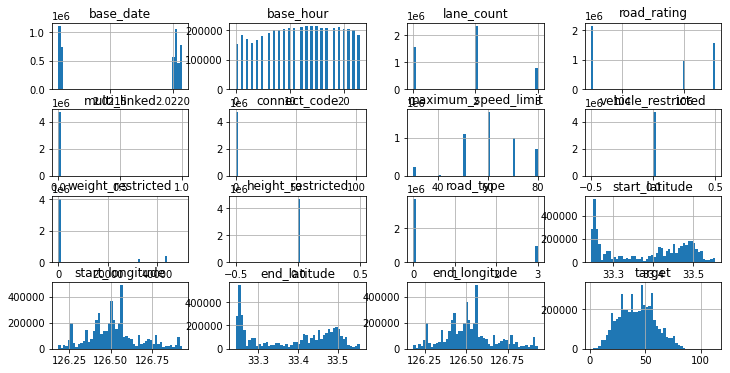

In [12]:
train.hist(figsize=(12, 6), bins=50);

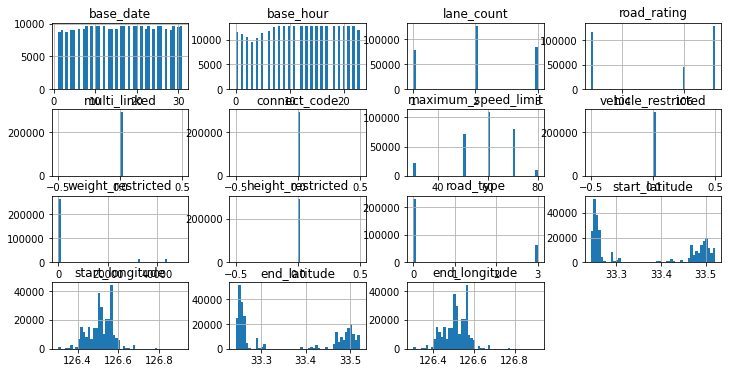

In [13]:
test.hist(figsize=(12, 6), bins=50);

In [14]:
train.corr()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


결측치 확인

In [15]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [16]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

전처리 하기 

In [17]:
# 메모리를 줄이기 위해 다운캐스트 
for col in train.columns:
    if train[col].dtypes == "int64":
        train[col] = pd.to_numeric(train[col], downcast="unsigned")
    elif train[col].dtypes == "float64":
        train[col] = pd.to_numeric(train[col], downcast="float")
    elif train[col].dtypes == "bool":
        train[col] = pd.to_numeric(train[col], downcast="int8")
    elif train[col].dtypes == "object":
        train[col] = train[col].astype("category")

In [18]:
train['base_date']= train['base_date'].astype('str')
#  train에서 base_date컬럼을 datetime을 이용해 정리
train["year"] = pd.to_datetime(train["base_date"]).dt.year
train["month"] = pd.to_datetime(train["base_date"]).dt.month
train["day"] = pd.to_datetime(train["base_date"]).dt.day
train.head(2)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,126.662613,없음,제3교래교,33.42775,126.662338,없음,52.0,2022,6,23
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,126.529106,있음,KAL사거리,33.50481,126.526237,없음,30.0,2022,7,28


In [19]:
test['base_date']= test['base_date'].astype('str')
test["year"] = pd.to_datetime(test["base_date"]).dt.year
test["month"] = pd.to_datetime(test["base_date"]).dt.month
test["day"] = pd.to_datetime(test["base_date"]).dt.day
test.head(2)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,2022,8,25
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,2022,8,9


In [20]:
# 요일 숫자로 변경 
train.loc[train['day_of_week'] == "월","week"] = 1
train.loc[train['day_of_week'] == "화","week"] = 2
train.loc[train['day_of_week'] == "수","week"] = 3
train.loc[train['day_of_week'] == "목","week"] = 4
train.loc[train['day_of_week'] == "금","week"] = 5
train.loc[train['day_of_week'] == "토","week"] = 6
train.loc[train['day_of_week'] == "일","week"] = 7

test.loc[train['day_of_week'] == "월","week"] = 1
test.loc[train['day_of_week'] == "화","week"] = 2
test.loc[train['day_of_week'] == "수","week"] = 3
test.loc[train['day_of_week'] == "목","week"] = 4
test.loc[train['day_of_week'] == "금","week"] = 5
test.loc[train['day_of_week'] == "토","week"] = 6
test.loc[train['day_of_week'] == "일","week"] = 7

In [21]:
# 이동량이 많을 금토일 을 따로 묶기 
train["weekend"] = train['week'] >=5
test["weekend"] = test['week'] >=5

In [22]:
# start_turn_restricted 과 end_turn_restricted bool타입으로 전환
train["start_turn_restricted"] = train["start_turn_restricted"].astype('bool')
train["end_turn_restricted"] = train["end_turn_restricted"].astype('bool')
test["start_turn_restricted"] = test["start_turn_restricted"].astype('bool')
test["end_turn_restricted"] = test["end_turn_restricted"].astype('bool')

In [24]:
train["target"].value_counts()


48.0     112044
49.0     110244
50.0     108822
54.0     108040
51.0     107347
          ...  
112.0         2
96.0          2
113.0         2
98.0          1
103.0         1
Name: target, Length: 102, dtype: int64

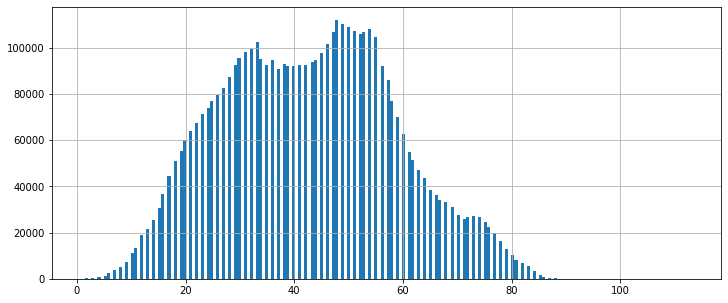

In [25]:
train["target"].hist(bins = 200, figsize = (12, 5))

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# str_col = ['start_turn_restricted','end_turn_restricted']
# for i in str_col:
#     le = LabelEncoder()
#     le=le.fit(train[i])
#     train[i]=le.transform(train[i])
    
#     for label in np.unique(test[i]):
#         if label not in le.classes_: 
#             le.classes_ = np.append(le.classes_, label)
#     test[i]=le.transform(test[i])

정답값이자 예측해야 될 값

In [26]:
label_name = "target"
label_name

'target'

In [27]:
train.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target',
       'year', 'month', 'day', 'week', 'weekend'],
      dtype='object')

In [28]:
feature_name = ['base_hour', 'lane_count', 'road_rating', 'multi_linked',
       'connect_code', 'maximum_speed_limit',
       'weight_restricted', 'height_restricted','start_turn_restricted',
       'end_turn_restricted','road_type', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'year',
       'month', 'day', 'week', 'weekend']
feature_name

['base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'weight_restricted',
 'height_restricted',
 'start_turn_restricted',
 'end_turn_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'year',
 'month',
 'day',
 'week',
 'weekend']

In [29]:
train[feature_name]

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,week,weekend
0,17,1,106,0,0,60.0,32400.0,0.0,True,True,3,33.427746,126.662613,33.427750,126.662338,2022,6,23,4.0,False
1,21,2,103,0,0,60.0,0.0,0.0,True,True,0,33.500729,126.529106,33.504810,126.526237,2022,7,28,4.0,False
2,7,2,103,0,0,80.0,0.0,0.0,True,True,0,33.279144,126.368599,33.280071,126.362144,2021,10,10,7.0,True
3,13,2,107,0,0,50.0,0.0,0.0,True,True,0,33.246082,126.567207,33.245564,126.566231,2022,3,11,5.0,True
4,8,2,103,0,0,80.0,0.0,0.0,True,True,0,33.462215,126.326553,33.462677,126.330154,2021,10,5,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,True,True,0,33.422146,126.278122,33.420956,126.273750,2021,11,4,4.0,False
4701213,2,2,107,0,0,80.0,43200.0,0.0,True,True,3,33.472504,126.424370,33.472527,126.424889,2022,3,31,4.0,False
4701214,22,2,103,0,0,60.0,0.0,0.0,True,True,0,33.447182,126.912582,33.444122,126.912949,2022,6,13,1.0,False
4701215,2,2,103,0,0,80.0,0.0,0.0,True,True,0,33.443596,126.431816,33.444996,126.433334,2021,10,20,3.0,False


In [30]:
X_train = train[feature_name]
print(X_train.shape)
X_train.head()

(4701217, 20)


,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,week,weekend
0,17,1,106,0,0,60.0,32400.0,0.0,True,True,3,33.427746,126.662613,33.427750,126.662338,2022,6,23,4.0,False
1,21,2,103,0,0,60.0,0.0,0.0,True,True,0,33.500729,126.529106,33.504810,126.526237,2022,7,28,4.0,False
2,7,2,103,0,0,80.0,0.0,0.0,True,True,0,33.279144,126.368599,33.280071,126.362144,2021,10,10,7.0,True
3,13,2,107,0,0,50.0,0.0,0.0,True,True,0,33.246082,126.567207,33.245564,126.566231,2022,3,11,5.0,True
4,8,2,103,0,0,80.0,0.0,0.0,True,True,0,33.462215,126.326553,33.462677,126.330154,2021,10,5,2.0,False


In [31]:
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(291241, 20)


,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,week,weekend
0,17,3,107,0,0,70.0,0.0,0.0,True,True,0,33.499427,126.541298,33.500772,126.543837,2022,8,25,4.0,False
1,12,2,103,0,0,70.0,0.0,0.0,True,True,3,33.258507,126.427003,33.258119,126.415840,2022,8,9,4.0,False
2,2,1,103,0,0,60.0,0.0,0.0,True,True,0,33.258960,126.476508,33.259206,126.474687,2022,8,5,7.0,True
3,23,3,103,0,0,70.0,0.0,0.0,True,True,0,33.473494,126.545647,33.471061,126.545467,2022,8,18,5.0,True
4,17,3,106,0,0,70.0,0.0,0.0,True,True,0,33.501477,126.569223,33.496863,126.581230,2022,8,10,2.0,False


In [32]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(4701217,)


0    52.0
1    30.0
2    61.0
3    20.0
4    38.0
Name: target, dtype: float32

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1, random_state=42)
model

RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1,
                      random_state=42)

In [35]:
# 실행, 점수 계산 시간, 점수가 나옵니다.
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict 
pd.DataFrame(cross_validate(model, X_train, y_train, cv=3))

,fit_time,score_time,test_score
0,1864.448974,33.747507,0.913166
1,1871.165217,27.373157,0.913414
2,1810.747247,26.795645,0.912999


In [34]:
# 학습시키기
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1,
                      random_state=42)

In [36]:
# 예측하기
y_predict = model.predict(X_test)
y_predict[:5]

array([25.3685659 , 43.44678829, 65.25196015, 37.24948209, 40.22815129])

In [40]:
# 제출파일만들기
sample_submission = pd.read_csv('/content/drive/MyDrive/data/sample_submission.csv')

In [41]:
sample_submission['target'] = y_predict
sample_submission.to_csv("/content/drive/MyDrive/data/submit.csv", index = False)

In [42]:
sample_submission

,id,target
0,TEST_000000,25.368566
1,TEST_000001,43.446788
2,TEST_000002,65.251960
3,TEST_000003,37.249482
4,TEST_000004,40.228151
...,...,...
291236,TEST_291236,47.691200
291237,TEST_291237,51.914571
291238,TEST_291238,22.890666
291239,TEST_291239,24.284546
